<h1>Diccionario de datos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# ¡Llena ese carrito!

# Tabla de Contenido 

<a id='tabla'></a>

* [Introducción](#intro)
* [Etapa 1. Diccionario de Datos](#dicc)
    * [Descrioción de Datos](#descrip)
    * [Plan de Solución](#plan)
    * [Conclusiones](#conclu)
* [Etapa 2. Procesamiento de Datos](#procesamiento)
    * [Plan de Solución](#plandos1)
    * [Encuentra y Elimina Valores Duplicados](#plandos2)
    * [instacart_orders DataFrame](#plandos3)
    * [products DataFrame](#plandos4)
    * [department DataFrame](#plandos5)
    * [aisles DataFrame](#plandos6) 
    * [order_products DataFrame](#plandos7)
* [Etapa 3.Encuentra y elimina los valores ausentes](#plantres1)
    * [products DataFrame](#plantres2)
    * [instacart_orders DataFrame](#plantres3)
    * [order_products DataFrame](#plantres4)
    * [Conclusiones](#plantres5)
* [Etapa 4. Analisis de Datos](#plancuatro1)
    * [[A1] Verifica que los valores sean sensibles](#plancuatro2)
    * [[A2] ¿Para cada hora del día, ¿cuántas personas hacen órdenes?](#plancuatro3)
    * [[A3] ¿Qué día de la semana compran víveres las personas?](#plancuatro4)
    * [[A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.](#plancuatro5)
    
    * [[B1]Diferencia entre miércoles y sábados para 'order_hour_of_day'. Traza gráficos de barra para los dos días y describe las diferencias que veas.](#plancuatro6)
    * [[B2]¿Cuál es la distribución para el número de pedidos por cliente?](#plancuatro7)
    * [[B3]¿Cuáles son los 20 productos más populares (muestra su ID y nombre)? ](#plancuatro8)
    
    * [[C1]¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?](#plancuatro9)
    * [[C2]¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)? 
](#plancuatro10)
    * [[C3]Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?](#plancuatro11)
    * [[C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido? ](#plancuatro12)
    * [[C5]¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos? ](#plancuatro13)
* [Conclusiones Generales del Proyecto](#plancuatro14)


# Introducción <a id='intro'></a>

[Ver Tabla de Contenido](#tabla)

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


# Diccionario de datos <a id='dicc'></a>

[Ver Tabla de Contenido](#tabla)

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

<a id='descrip'></a> <h1>Etapa 1. Descripción de los datos</h1>

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


#  Plan de solución <a id='plan'></a> 

[Ver Tabla de Contenido](#tabla)

* Realizar un análisis exploratorio de datos realizando, constará de: 
    - Importación de librerias
    - Analizar DataFrames con info()
    - Verificar la cantidad de valores ausentes
    - Verificar nombres de cada columna
    - Verificar el tipo de dato de cada columna
    

In [1]:
# importar librerías

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
# leer conjuntos de datos en los DataFrames 

instacart = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
orderproducts = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame 'instacart_orders'

instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame 'products'

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame 'aisles'

aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame 'departaments'

departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame 'df_orderproducts'

orderproducts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


# Conclusiones <a id='conclu'></a> 

[Ver Tabla de Contenido](#tabla)

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Para los DataFrames podemos observar lo siguiente:

- Se tuvo que establecer el parameto **sep= ';'** ya el delimitador no se habia aplicado correctamente al cargar los datos, por lo que arrojaba 1 sola columna con diferentes nombres, separados por (;).


- Ya habiendo aplicado **sep= ';'** pudimos observar la distrubucion correcta de nuestras columnas.


- Del del DataFrame **'instacart'**, podemos observar que la columna  days_since_prior_order, contiene valores nulos NaN. Contiene 28,819 valores nulos.


- Del del DataFrame **'products'**, podemos observar que la columna  product_name  del, contiene valores nulos NaN contiene 1258 valores nulos.


- De los DataFrames **'aisles' y 'departaments'**, por la cantidad de non-null y total de RangeIndex, observamos que ninguna columna contiene valores faltantes.


- El ultimo DataFrame **'orderproducts'**, no se muestra el conteo de los non-null, debido a que cuando el número de filas es grande (millones de filas, como es el caso), pandas omite mostrar el conteo de non-null para optimizar el resumen de info().


- Para todos los casos podemos observar los tipos de datos de cada columna y la memoria usada en cada caso.


# Etapa 2. Preprocesamiento de los datos <a id='procesamiento'></a> 

[Ver Tabla de Contenido](#tabla)

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

# Plan de solución <a id='plandos1'></a>

[Ver Tabla de Contenido](#tabla)

* Realizar un procesamiento de datos que constará de:
    - Revisión de duplicados [Uso de duplicated]
    - Eliminar filas duplicadas [Uso de drop_duplicates]
    - Revisar si hay nombre dulicados de productos [Uso de upper()]
    - Revisar duplicados no faltantes [Uso de notna()]
    


# Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones). <a id='plandos2'></a>

[Ver Tabla de Contenido](#tabla)

# `instacart_orders` data frame  <a id='plandos3'></a>

[Ver Tabla de Contenido](#tabla)

In [8]:
# Revisa si hay pedidos duplicados

instacart_duplicados= instacart.duplicated(keep=False).sum()
print('Cantidad de Pedidos Duplicados:', instacart_duplicados)

Cantidad de Pedidos Duplicados: 30


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si hay lineas duplicadas. Para ver que tienen en comun debemos imprimir las filas de los duplicados de dicho DataFrame para analizarlo.

In [9]:
# Basándote en tus hallazgos

# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

duplicados =  instacart[instacart.duplicated(keep=False)] 
# keep=False para mostrar todas las ocurrencias de duplicados, sin mantener ninguna como unica
print(duplicados)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

<div class="alert alert-block alert-info">
<p style="font-size: 20px; margin: 0;">Filtrando pedidos del miércoles a las 2 am <a class="tocSkip"></a>
</div>

In [10]:
# Filtrando pedidos del miércoles a las 2 am

filtrando_pedidos = instacart[(instacart['order_dow']==3) & (instacart['order_hour_of_day']==2)]

print(filtrando_pedidos)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

**¿Qué sugiere este resultado?**

Al verificar los valores duplicados del Dataframe, podemos observar que estos pertenecen al dia miercoles a las 2 am. Efectivamente hay ordenes duplicadas, ya tiene hay ordenes que tiene el mismo valor de 'order_id', el cual idenfica de manera unica cada pedido, y los diferentes valores de sus columnas son los mismos tambien.

In [11]:
# Elimina los pedidos duplicados

instacart_clean = instacart.drop_duplicates(keep=False)

In [12]:
# Vuelve a verificar si hay filas duplicadas

verificar_filas_instacart_clean = instacart_clean.duplicated(keep=False).sum()
print('Cantidad de duplicados:', verificar_filas_instacart_clean)

Cantidad de duplicados: 0


In [13]:
# Vuelve a verificar si hay IDs duplicados de pedidos

verificar_duplicados = instacart_clean['order_id'][instacart_clean['order_id'].duplicated(keep=False)].sum()
print('Duplicados en order_id (IDs de pedidos):',verificar_duplicados)


Duplicados en order_id (IDs de pedidos): 0


**Describe brevemente tus hallazgos y lo que hiciste con ellos**

Se muestra que los valores de la columna **order_id** se imprime vacio, ya no hay duplicados, para ello se realizo lo siguiente:

✓Comprobacion de cantidad de duplicados en DataFrame (instacar), mostrando todas las ocurrencias encontradas sin mantener ninguna como unica.

✓Uso del metodo 'duplicated' con keep=False, para eliminar unicamente los duplicados sin mantener ninguna como unica.

# `products` data frame   <a id='plandos4'></a>

[Ver Tabla de Contenido](#tabla)

In [14]:
# Verifica si hay filas totalmente duplicadas

#keep=False para todas filas que tienen valores duplicadas sin excepcion.

products_duplicados= products.duplicated(keep=False).sum()
print('Cantidad de Duplicados:', products_duplicados)

Cantidad de Duplicados: 0


In [15]:
# Verifica si hay IDs duplicadas de productos

duplicados_products = products['product_id'][products['product_id'].duplicated(keep=False)].sum()
print('Duplicados de product_id (IDs de Productos):', duplicados_products)


Duplicados de product_id (IDs de Productos): 0


In [16]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

#convertir en mayusculas todos los nombres
products['product_name']= products['product_name'].str.upper()
print(products.head(n=10))


   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   
5           6                                       DRY NOSE OIL        11   
6           7                     PURE COCONUT WATER WITH ORANGE        98   
7           8                  CUT RUSSET POTATOES STEAM N' MASH       116   
8           9                  LIGHT STRAWBERRY BLUEBERRY YOGURT       120   
9          10     SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE       115   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
5             11  
6       

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes

# filtro de products['product_name'].notna() & products['product_name'].duplicated(keep=False) donde product_name que sean no NaN y esten duplicados

duplicados_no_nan = products[products['product_name'].notna() & products['product_name'].duplicated(keep=False)].sort_values(by='product_name', ascending=True)
print(duplicados_no_nan.head(n=30))

# sort_values(by='product_name', ascending=True) para ordenar alfabeticamente y visualizar mejor los duplicados no faltantes


       product_id                               product_name  aisle_id  \
23339       23340  18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP        25   
31844       31845  18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP        25   
19941       19942            AGED BALSAMIC VINEGAR OF MODENA        19   
13152       13153            AGED BALSAMIC VINEGAR OF MODENA        19   
24830       24831         ALBACORE SOLID WHITE TUNA IN WATER        95   
22582       22583         ALBACORE SOLID WHITE TUNA IN WATER        95   
9037         9038                     AMERICAN CHEESE SLICES        21   
515           516                     AMERICAN CHEESE SLICES        21   
49530       49531               ANCHOVY FILLETS IN OLIVE OIL        95   
12325       12326               ANCHOVY FILLETS IN OLIVE OIL        95   
27802       27803                         APRICOT ENERGY BAR         3   
41221       41222                         APRICOT ENERGY BAR         3   
45230       45231                     

**Describe brevemente tus hallazgos.**

✓Podemos observar que hay varios productos con el mismo nombre pero diferente id de producto, posiblemente se deba a que puede pertenecer a una marca diferente de ese mismo producto, seria conveniente consultar esto.

# `departments` data frame  <a id='plandos5'></a>

[Ver Tabla de Contenido](#tabla)

In [18]:
# Revisa si hay filas totalmente duplicadas

departments_duplicados= departments.duplicated(keep=False).sum()
print('Cantidad de Duplicados:', departments_duplicados)

Cantidad de Duplicados: 0


In [19]:
# Revisa si hay IDs duplicadas 

verificar_departments_duplicados = departments['department_id'][departments['department_id'].duplicated(keep=False)].sum()
print('Duplicados de (IDs Department):', verificar_departments_duplicados)


Duplicados de (IDs Department): 0


**Describe brevemente tus hallazgos.**

✓Observamos que no hay duplicados en el DataFrame de departments.

✓Tampoco se encontro IDs de Department duplicados.


# `aisles` data frame  <a id='plandos6'></a>

[Ver Tabla de Contenido](#tabla)

In [20]:
# Revisa si hay filas totalmente duplicadas

asiles_duplicados= aisles.duplicated(keep=False).sum()
print('Cantidad de Duplicados:', asiles_duplicados)

Cantidad de Duplicados: 0


In [21]:
# Revisa si hay IDs duplicadas 

verificar_asiles_duplicados = aisles['aisle_id'][aisles['aisle_id'].duplicated(keep=False)].sum()
print('Duplicados de (IDs Aisles):', verificar_asiles_duplicados)


Duplicados de (IDs Aisles): 0


**Describe brevemente tus hallazgos.**

✓Observamos que no hay duplicados en el DataFrame de departments.

✓Tampoco se encontro IDs de Aisle duplicados.


# `order_products` data frame <a id='plandos7'></a>

[Ver Tabla de Contenido](#tabla)

In [22]:
# Revisa si hay filas totalmente duplicadas

order_products_duplicados= orderproducts.duplicated(keep=False).sum()
print('Cantidad de Duplicados:', order_products_duplicados)


Cantidad de Duplicados: 0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso


order_products_pd = pd.merge(orderproducts, products, on='product_id', how='inner')

resultado = order_products_pd[['order_id', 'product_id', 'add_to_cart_order','product_name']]

# Buscando duplicados donde order_id y product_name se encuentre repetidos en ambas columnas

duplicados_order = resultado[resultado.duplicated(subset=['order_id', 'product_name'], keep=False)]

# Excluimos los NaN

print('*** Duplicados engañosos no NaN ***:')
print()

duplicado_nonan = duplicados_order[duplicados_order['product_name'].notna()]
print(duplicado_nonan)
print()

# Suma solo duplicados NaN

print('*** Total Duplicados NaN ***:')
print()
print(duplicados_order.isna().sum())
print()

# Imprimiendo todos los duplicados donde order_id y product_name repetidos en ambas columnas
 
print('*** Duplicados NaN y no NaN engañoso ***:')
print()
print(duplicados_order)
                                                     

*** Duplicados engañosos no NaN ***:

         order_id  product_id  add_to_cart_order  \
1671714   2302000       15610                4.0   
1671819   1391236       15610               12.0   
3001712    444628       14464                5.0   
3201207   1391236       18761               11.0   
3201250   2302000       18761                5.0   
3855897   2641193       35883                4.0   
4139689   2554691        8811               21.0   
4221830   2641193       15442                3.0   
4415518      4988       26964                1.0   
4447312    444628       17321                4.0   
4472435   2889433       43776               23.0   
4472436   1471905       43776               22.0   
4483448   2554691       38056               23.0   
4493593   1471905       12462                2.0   
4493596   2889433       12462                3.0   
4525279      4988       33656                2.0   

                                      product_name  
1671714                 

**Describe brevemente tus hallazgos.**

✓Se realizo un filtrado entra los DataFrame de **orderproducts** y **products** para encontrar duplicados  entre los order_id y product_name.

✓Encontramos nombres de productos exactamente iguales pero con diferente id de producto. Lo cual se considera engañoso ya id de producto deberia ser unico para cada producto en especifico.

✓Los otros 2297 representa a product_name de tipo NaN y los otros 16 restantes duplicados engañosos de tipo no NaN, para un total de 2313 filas.

# Etapa 3. Encuentra y elimina los valores ausentes  <a id='plantres1'></a>

[Ver Tabla de Contenido](#tabla)

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

# `products` data frame <a id='plantres2'></a>

[Ver Tabla de Contenido](#tabla)

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'

valores_ausentes_productname = products.isna().sum()
print(valores_ausentes_productname)

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


**Describe brevemente tus hallazgos.**

✓ Encontramos 1258 valores ausentes product_name

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

ausentes_products = products[products['product_name'].isna()]

# Filtrando donde pasillo ID es 100

filtro_ausentes_aisle = ausentes_products[ausentes_products['aisle_id'] == 100]
print(filtro_ausentes_aisle)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


**Describe brevemente tus hallazgos.**

✓ Podemos observar que los 1258 ausentes si etsan relacionados con pasillo ID 100

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

# Filtrando donde departamento ID es 21

filtro_ausentes_department = ausentes_products[ausentes_products['department_id'] == 21]
print(filtro_ausentes_department)


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


**Describe brevemente tus hallazgos.**

✓ Podemos observar que los 1258 product_name NaN estan relacionados con el departamento ID 21

In [70]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

# Como no tenemos columna en comun, creamos una columna temporal para hacer union de ambos DataFrames

departments['key'] = 1
aisles['key'] = 1

departments_aisle = pd.merge(departments, aisles, on='key', how='inner')

# Eliminar la columna temporal
departments_aisle = departments_aisle.drop('key', axis=1)

#Filtramos pasillo con ID 100 y el departamento con ID 21

filtro_department_aisle = departments_aisle.query('aisle_id == 100 and department_id == 21')

print(filtro_department_aisle)

      department_id department  aisle_id    aisle
2779             21    missing       100  missing


**Describe brevemente tus hallazgos.**

✓ Podemos observar que existe un deparmento con nombre Missing

In [38]:
# Completa los nombres de productos ausentes con 'Unknown'

# Reemplazar los NaN en product_name con 'Unknown' en products_clean (dataFrame limpio)

products_clean = products.copy()

products_clean['product_name'] = products_clean['product_name'].fillna('Unknown')

print(products_clean[products_clean['product_name']=='Unknown'])


       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


# `Instacart` data frame <a id='plantres3'></a>

[Ver Tabla de Contenido](#tabla)

In [39]:
# Encuentra los valores ausentes

valores_ausentes_orders = instacart_clean.isna().sum()
print(valores_ausentes_orders)


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28815
dtype: int64


In [28]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# -----------------------------------------------------------------------

# Evaluando valor minimmo de order_number

valor_minimo= instacart_clean['order_number'].min() 
print('Valor minimo para order_number:', valor_minimo)
print()

primero_no_pedidos= instacart_clean[instacart_clean['order_number']>1]

# Evaluando ausentes de los no son primer pedidos de cliente

ausentes_primero_no_pedidos = primero_no_pedidos.isna().sum()

print(ausentes_primero_no_pedidos)

Valor minimo para order_number: 1

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


✓ No encontramos ausentes para las ordenes que no sean del primer pedido 

# `order_products` data frame <a id='plantres4'></a>

[Ver Tabla de Contenido](#tabla)

In [40]:
# Encuentra los valores ausentes

valores_ausentes_ordersproducts = orderproducts.isna().sum()
print(valores_ausentes_ordersproducts)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [41]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

valor_min_orders = orderproducts['add_to_cart_order'].min()

valor_max_orders = orderproducts['add_to_cart_order'].max()

print('Valor minimo:', valor_min_orders)

print('Valor minimo:', valor_max_orders)

Valor minimo: 1.0
Valor minimo: 64.0


In [42]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

pedidos_con_valores_ausentes= orderproducts[orderproducts['add_to_cart_order'].isna()]

print(pedidos_con_valores_ausentes)


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [43]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

# ------------------------------------------------------------------------------------------------------------

# Creando una lista con los valores unicos de order_id

pedidos_con_valores_ausentes = list(pedidos_con_valores_ausentes['order_id'].unique())

# Agrupar por 'order_id' y contar el número de productos por pedido usando 'product_id' 
# Y .isin(pedidos_con_valores_ausentes) verifica si cada valor en la columna 'order_id' está presente en pedidos_con_valores_ausentes

conteo_productos_por_pedido = orderproducts[orderproducts['order_id'].isin(pedidos_con_valores_ausentes)].groupby('order_id')['product_id'].count().reset_index(name='product_count')

#  Verificamos que todo el conteo de conteo_productos_por_pedido sea mayor a 64
verificar_conteo = (conteo_productos_por_pedido['product_count']>64).all()

if verificar_conteo:
    print("Todos los pedidos con valores ausentes tienen más de 64 productos.")
else:
    print("No todos los pedidos con valores ausentes tienen más de 64 productos.")
    
print()
# Impresion de conteo de productos por pedido

print('Agrupando ausentes por su ID de pedido')
print()
print(conteo_productos_por_pedido)
print()

# Evaluar el valor minimo del conteo

valor_minimo = conteo_productos_por_pedido['product_count'].min()

print('El valor minimo de conteo es:', valor_minimo)

Todos los pedidos con valores ausentes tienen más de 64 productos.

Agrupando ausentes por su ID de pedido

    order_id  product_count
0       9310             65
1      61355            127
2     102236             95
3     129627             69
4     165801             70
..       ...            ...
65   2999801             70
66   3125735             86
67   3308010            115
68   3347453             71
69   3383594             69

[70 rows x 2 columns]

El valor minimo de conteo es: 65


<div class="alert alert-block alert-info">
<p style="font-size: 20px; margin: 0;">Todos los pedidos con valores ausentes tienen más de 64 productos.</p>
<p>Despues del conteo realizó un IF arriba, donde ejecuto impresión si se cumple la condición, y en caso en caso contrario mostrar que no se cumple la condición. En este caso si se cumple la condición, de que si todos los pedidos con valores ausentes son mayores a 64 productos. <a class="tocSkip"></a>
</div>

In [44]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

orderproducts_clean = orderproducts.copy()

orderproducts_clean['add_to_cart_order'] = orderproducts_clean['add_to_cart_order'].fillna('999')

print(orderproducts_clean[orderproducts_clean['add_to_cart_order']=='999'])

print()

# Convertir columna a tipo entero

orderproducts_clean['add_to_cart_order'] = orderproducts_clean['add_to_cart_order'].astype('int')

orderproducts_clean.info()

         order_id  product_id add_to_cart_order  reordered
737       2449164        5068               999          0
9926      1968313       43867               999          0
14394     2926893       11688               999          0
16418     1717990        4142               999          0
30114     1959075       42828               999          1
...           ...         ...               ...        ...
4505662   1800005        7411               999          0
4511400   1633337         260               999          0
4517562    404157        9517               999          0
4534112   1673227       17835               999          0
4535739   1832957       17949               999          1

[836 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   

# Conclusiones <a id='plantres5'></a>

[Ver Tabla de Contenido](#tabla)

- Se encontró que todos nombres  de productos ausentes están relacionados con el pasillo con ID 100

- Se encontró que todos los nombres de productos ausentes están relacionados con el departamento con ID 21

- Se encontró la existencia de un departmento llamado 'missing', relacionado con el pasillo 100 e ID de departamento 21

- Se encontró valores ausentes en Instacart en la columna ays_since_prior_order 

- Se encontró valores ausentes en order_products en la columna add_to_cart_order  

- Se encontró que todos los pedidos con valores ausentes tienen más de 64 productos. 

- Se realizó reemplazo de valores ausentes NaN por 'Unknown' en product_name, tambien se realizó de ausentes en add_to_cart_order por '999'




# Etapa 4. Análisis de los datos <a id='plancuatro1'></a>

[Ver Tabla de Contenido](#tabla)

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

# [A1] Verifica que los valores sean sensibles <a id='plancuatro2'></a>

[Ver Tabla de Contenido](#tabla)

In [45]:
# Verificar que 'order_hour_of_day' esté entre 0 y 23

#-------------------------------------------------------------------------------------------------------------------

# Usamos between para verificar que este dentro del rango especificado junto con all() para verificar que todos cumplan la condicion

valores_hour_of_day = instacart_clean['order_hour_of_day'].between(0, 23).all()

if valores_hour_of_day:
   print('Todos los valores en order_hour_of_day son razonables (oscilan entre 0 y 23)')
else:
   print('Hay valores no razonables en order_hour_of_day')


# Verificar que 'order_dow' esté entre 0 y 6

valores_order_dow = instacart_clean['order_dow'].between(0, 6).all()

if valores_order_dow:
   print('Todos los valores en order_dow son razonables (oscilan entre 0 y 6)')
else:
   print('Hay valores no razonables en order_dow')



Todos los valores en order_hour_of_day son razonables (oscilan entre 0 y 23)
Todos los valores en order_dow son razonables (oscilan entre 0 y 6)


<div class="alert alert-block alert-info">
<p style="font-size: 20px; margin: 0;">Otra forma de comprobar los valores de order_hour_of_day' y 'order_dow' usando unique() <a class="tocSkip"></a>
</div>

In [46]:
# Verificar que 'order_hour_of_day' esté entre 0 y 23


valores_hour_of_day_unique = sorted(instacart_clean['order_hour_of_day'].unique())

print(valores_hour_of_day_unique)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [47]:
# Verificar que 'order_dow' esté entre 0 y 6

valores_order_dow_unique = sorted(instacart_clean['order_dow'].unique())

print(valores_order_dow_unique)

[0, 1, 2, 3, 4, 5, 6]


# [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?  <a id='plancuatro3'></a>

[Ver Tabla de Contenido](#tabla)

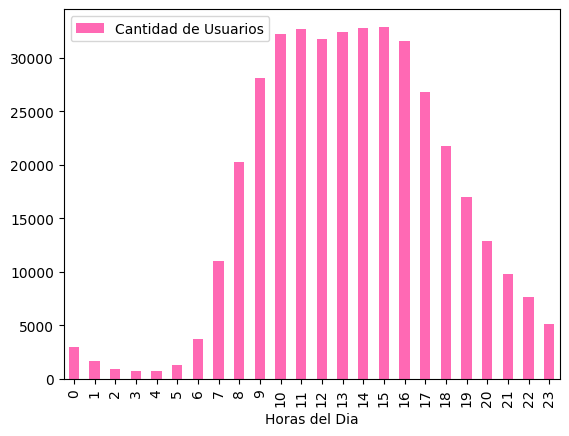

In [48]:
# Agrupamos el DataFrame instacart por los horas del dia junto con ['user_id'].nunique() para conocer la cantidad de usuarios unicos para grupo de horas

ordenes_por_hora = instacart_clean.groupby('order_hour_of_day')['user_id'].nunique()

# Convertir a DataFrame para mejor visualización 
ordenes_por_hora = ordenes_por_hora.reset_index(name='Cantidad de Usuarios')


ordenes_por_hora.plot(x='order_hour_of_day', kind='bar',color='hotpink', xlabel='Horas del Dia')
plt.show()


**Escribe aquí tus conclusiones:**

✓ Podemos observar que entre las 10 am y 16 pm son las horas del dia donde los clientes realizan más ordenes de pedidos.

# [A3] ¿Qué día de la semana compran víveres las personas?  <a id='plancuatro4'></a>

[Ver Tabla de Contenido](#tabla)

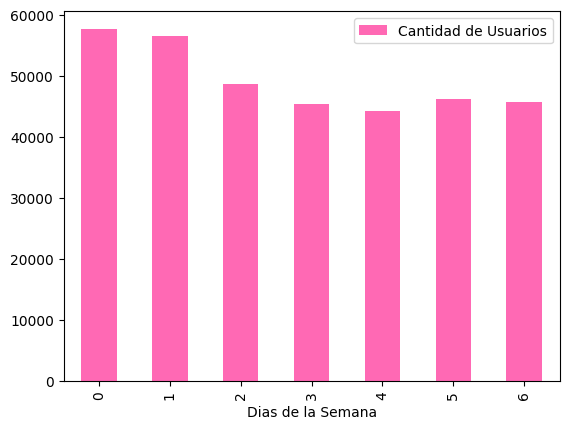

In [49]:
# Agrupamos el DataFrame instacart por las ordenes del dia junto con ['user_id'].nunique() para conocer la cantidad de usuarios unicos para grupo de ordenes

ordenes_por_semana = instacart_clean.groupby('order_dow')['user_id'].nunique()

# Convertir a DataFrame para mejor visualización 
ordenes_por_semana  = ordenes_por_semana.reset_index(name='Cantidad de Usuarios')

ordenes_por_semana.plot(x='order_dow', kind='bar',color='hotpink',xlabel='Dias de la Semana')

plt.show()


**Escribe aquí tus conclusiones:**

✓ Podemos observar que entre los dias sábados y domingos son los dias en los que mas se compra viveres

# [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.  <a id='plancuatro5'></a>

[Ver Tabla de Contenido](#tabla)

Tiempo minimo: 0.0
Tiempo maximo: 30.0



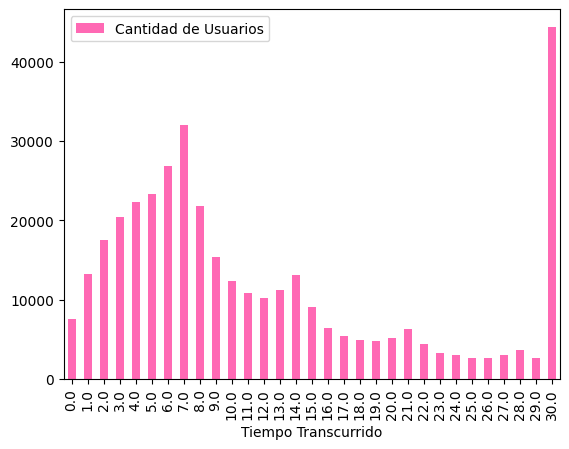

In [50]:
tiempo_transcurrido = instacart_clean.groupby('days_since_prior_order')['user_id'].nunique()

# Convertir a DataFrame para mejor visualización 
tiempo_transcurrido = tiempo_transcurrido.reset_index(name='Cantidad de Usuarios')

tiempo_min = tiempo_transcurrido['days_since_prior_order'].min()
tiempo_max = tiempo_transcurrido['days_since_prior_order'].max()

print('Tiempo minimo:',tiempo_min)
print('Tiempo maximo:',tiempo_max)

print()

tiempo_transcurrido.plot(x='days_since_prior_order', kind='bar',color='hotpink',xlabel='Tiempo Transcurrido')
plt.show()

**Escribe aquí tus conclusiones:**

✓ Podemos observar que entre la mayoria de los clientes esperan su mayoria entre 7 y 30 dias para hacer otro pedido.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

# [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas. 
<a id='plancuatro6'></a>

[Ver Tabla de Contenido](#tabla)

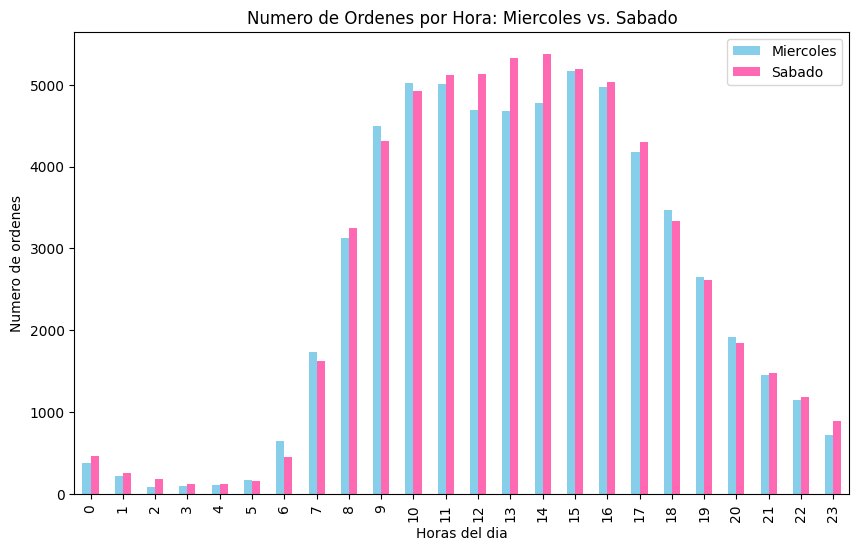

In [51]:
# Filtrar los datos para miércoles (3) y sábados (6)

miercoles_data = instacart_clean[instacart_clean['order_dow'] == 3]
sabado_data = instacart_clean[instacart_clean['order_dow'] == 6]

# Contar el número de pedidos por hora para cada día

miercoles_counts = miercoles_data['order_hour_of_day'].value_counts().sort_index()
sabado_counts = sabado_data['order_hour_of_day'].value_counts().sort_index()

# Crear un DataFrame combinado para graficar

instacart_df = pd.DataFrame({
    'Miercoles': miercoles_counts,
    'Sabado': sabado_counts
})

# Graficar gráficos de barras

instacart_df.plot(kind='bar', figsize=(10, 6), 
                  color=['skyblue', 'hotpink'],
                  title='Numero de Ordenes por Hora: Miercoles vs. Sabado', 
                  xlabel = 'Horas del dia', ylabel='Numero de ordenes')

plt.show()

**Escribe aquí tus conclusiones:**

✓ Podemos observar que no hay mucha variación entre ambos dias, son bastantes similares y las horas del dia con mayor afluencia de ordenes es entre las 10 am y 16 pm.

# [B2] ¿Cuál es la distribución para el número de pedidos por cliente?  

[Ver Tabla de Contenido](#tabla)

<a id='plancuatro7'></a>

Valor maximo de pedidos: 28
Valor media de pedidos: 14.5



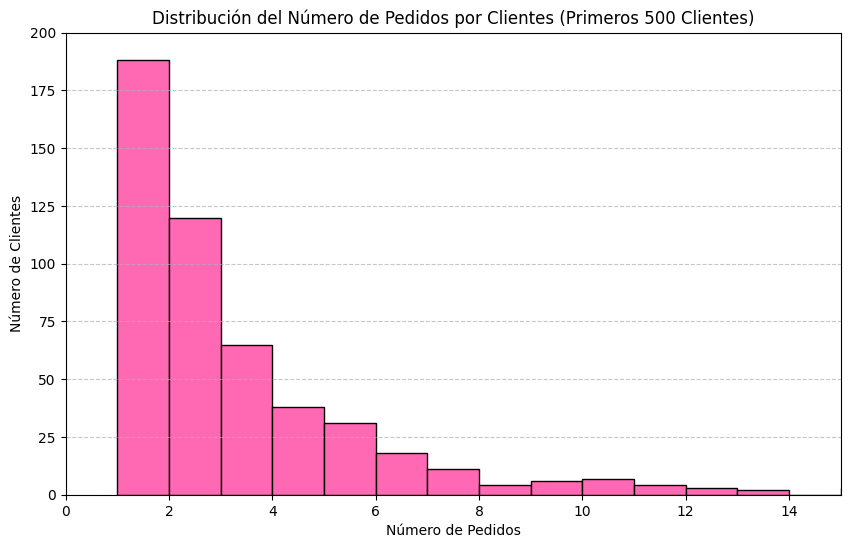

In [52]:
# Agrupacion de Ordenes por clientes

ordenes_de_clientes = instacart_clean.groupby('user_id')['order_number'].count().reset_index(name='order_number')

# Valores maximo y minimo en pedidos de clientes

maximo_de_pedido = ordenes_de_clientes['order_number'].max()
minimo_de_pedido = ordenes_de_clientes['order_number'].min()
valor_media_pedido = (minimo_de_pedido + maximo_de_pedido)/2


filtro_clientes_pedidos = ordenes_de_clientes.head(n=500)

print('Valor maximo de pedidos:', maximo_de_pedido)
print('Valor media de pedidos:', valor_media_pedido)

print()

# Graficar histograma del número de pedidos

plt.figure(figsize=(10, 6))
plt.hist(filtro_clientes_pedidos['order_number'], bins=15, color='hotpink', edgecolor='black')
plt.title('Distribución del Número de Pedidos por Clientes (Primeros 500 Clientes)')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.xlim(0, 15)
plt.ylim(0, 200) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Escribe aquí tus conclusiones:**

✓ Dada la distribución, podemos observar que a mayor cantidad de clientes, la cantidad de número pedidos que se realizan es mucho menor.


# [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)? <a id='plancuatro8'></a>

[Ver Tabla de Contenido](#tabla)

In [53]:
# Seleccionamos los 20 productos que tienen mas pedidos en la columna order_id

instacart_order = pd.merge(instacart_clean, orderproducts_clean, on='order_id', how='inner')

instacart_order_products = pd.merge(instacart_order, products, on='product_id', how='inner')

filtro_products = instacart_order_products.groupby(['product_name','product_id'])['product_id'].count().reset_index(name='cant')

# Utilizamos nlargest() para que nos traiga los 20 productos mas alto en el conteo 

filtro_products_popular = filtro_products.nlargest(20,'cant')

print(filtro_products_popular)


                   product_name  product_id   cant
3252                     BANANA       24852  66049
3057     BAG OF ORGANIC BANANAS       13176  53295
28718      ORGANIC STRAWBERRIES       21137  37039
25872      ORGANIC BABY SPINACH       21903  33971
27214      ORGANIC HASS AVOCADO       47209  29772
25838           ORGANIC AVOCADO       47766  24689
20096               LARGE LEMON       47626  21495
38562              STRAWBERRIES       16797  20018
21008                     LIMES       26209  19690
29232        ORGANIC WHOLE MILK       27845  19598
28207       ORGANIC RASPBERRIES       27966  19196
29311      ORGANIC YELLOW ONION       22935  15898
26937            ORGANIC GARLIC       24964  15292
29349          ORGANIC ZUCCHINI       45007  14582
26025       ORGANIC BLUEBERRIES       39275  13879
10410            CUCUMBER KIRBY       49683  13674
26918        ORGANIC FUJI APPLE       28204  12544
27472             ORGANIC LEMON        5876  12230
2331   APPLE HONEYCRISP ORGANIC

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

# [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución? <a id='plancuatro9'></a>

[Ver Tabla de Contenido](#tabla)

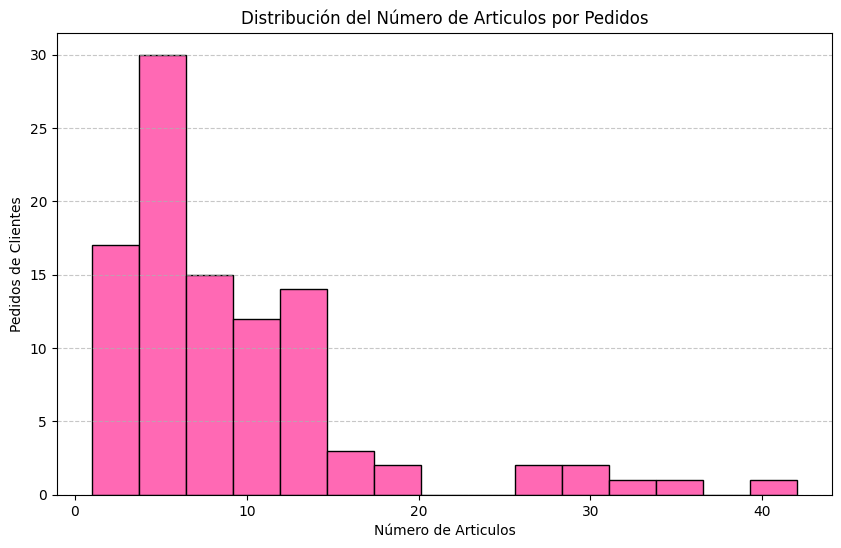

In [54]:
# Pedidos por clientes
pedidos_por_clientes = instacart_clean.groupby(['user_id','order_id'])['order_number'].count().reset_index(name='order_number')

# Agrupando pedidos de clientes con ordenes de productos 
grouby_pedidos_products = pd.merge(pedidos_por_clientes, orderproducts_clean, on='order_id', how='inner')

# Filtrando articulos por pedidos de clientes

groupby_articulos_pedidos = grouby_pedidos_products.groupby(['user_id','order_id'])['product_id'].count().reset_index(name='cant_art')

filtro_articulos_pedidos = groupby_articulos_pedidos.head(n=100)


# Graficar histograma del número de articulos por pedidos

plt.figure(figsize=(10, 6))
plt.hist(filtro_articulos_pedidos['cant_art'], bins=15, color='hotpink', edgecolor='black')
plt.title('Distribución del Número de Articulos por Pedidos')
plt.xlabel('Número de Articulos')
plt.ylabel('Pedidos de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Escribe aquí tus conclusiones:**

✓Podemos observar que en un pedido compran unos 40 articulos. A mayor cantidad de pedidos el numero de articulos a comprar disminuye.


# [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)? <a id='plancuatro10'></a>

[Ver Tabla de Contenido](#tabla)

In [55]:
#Filtar solo reordered ==1 (Representa la cantidad de pedidos que ha sido pedido mas de 1  vez)

filtro_reodered = instacart_order_products[instacart_order_products['reordered']==1]

# Agrupar product_id y product_name

agrupar_reodered = filtro_reodered.groupby(['product_id', 'product_name'])['reordered'].count().reset_index(name='total_reodered')

# Filtro los 20 productos con valores mas altos en la columna total_reodered 

filtro_total_orders_reodered = agrupar_reodered.nlargest(20,'total_reodered')

print(filtro_total_orders_reodered)

       product_id              product_name  total_reodered
17837       24852                    BANANA           55762
9383        13176    BAG OF ORGANIC BANANAS           44448
15138       21137      ORGANIC STRAWBERRIES           28639
15698       21903      ORGANIC BABY SPINACH           26233
33927       47209      ORGANIC HASS AVOCADO           23628
34337       47766           ORGANIC AVOCADO           18743
19995       27845        ORGANIC WHOLE MILK           16249
34234       47626               LARGE LEMON           15044
20083       27966       ORGANIC RASPBERRIES           14747
12010       16797              STRAWBERRIES           13945
18811       26209                     LIMES           13327
16450       22935      ORGANIC YELLOW ONION           11145
17919       24964            ORGANIC GARLIC           10411
32338       45007          ORGANIC ZUCCHINI           10074
35711       49683            CUCUMBER KIRBY            9537
20247       28204        ORGANIC FUJI AP

# [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir? <a id='plancuatro11'></a>

[Ver Tabla de Contenido](#tabla)

In [56]:
filtro_reodered_zero = instacart_order_products[instacart_order_products['reordered']==0]

# Utilizamos metodo agg() para realizar calculo de total_product_id y total_add_to_cart_order
agrupar_product_pro = filtro_reodered_zero.groupby(['product_id', 'product_name']).agg(
    
    total_product_id = ('product_id','count'),
    total_add_to_cart_order=('add_to_cart_order','sum')

)
agrupar_product_pro = agrupar_product_pro.reset_index()

# Calcular la suma total de pedidos
total_orders_pro = agrupar_product_pro['total_product_id'] + agrupar_product_pro['total_add_to_cart_order']

# Calcular la proporción usando min() 
agrupar_product_pro['proportion'] = (agrupar_product_pro[['total_product_id', 'total_add_to_cart_order']].min(axis=1) / total_orders_pro)*100

# Mostrar el resultado
print(agrupar_product_pro[['product_id', 'product_name', 'proportion']].head(n=50))

    product_id                                       product_name  proportion
0            1                         CHOCOLATE SANDWICH COOKIES   15.080346
1            2                                   ALL-SEASONS SALT   10.280374
2            3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   12.222222
3            4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...    9.125475
4            7                     PURE COCONUT WATER WITH ORANGE   33.333333
5            8                  CUT RUSSET POTATOES STEAM N' MASH    8.904110
6            9                  LIGHT STRAWBERRY BLUEBERRY YOGURT   25.000000
7           10     SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE    9.140049
8           11                                  PEACH MANGO JUICE   11.111111
9           12                         CHOCOLATE FUDGE LAYER CAKE   10.373444
10          13                                  SALINE NASAL MIST   14.285714
11          14                     FRESH SCENT DISHWASHER CLEANE

<div class="alert alert-block alert-info">
<p style="font-size: 20px; margin: 0;">Gráfico de Barras/ Proporción de veces que se pide<a class="tocSkip"></a>
</div>

# Proporción de veces que se pide

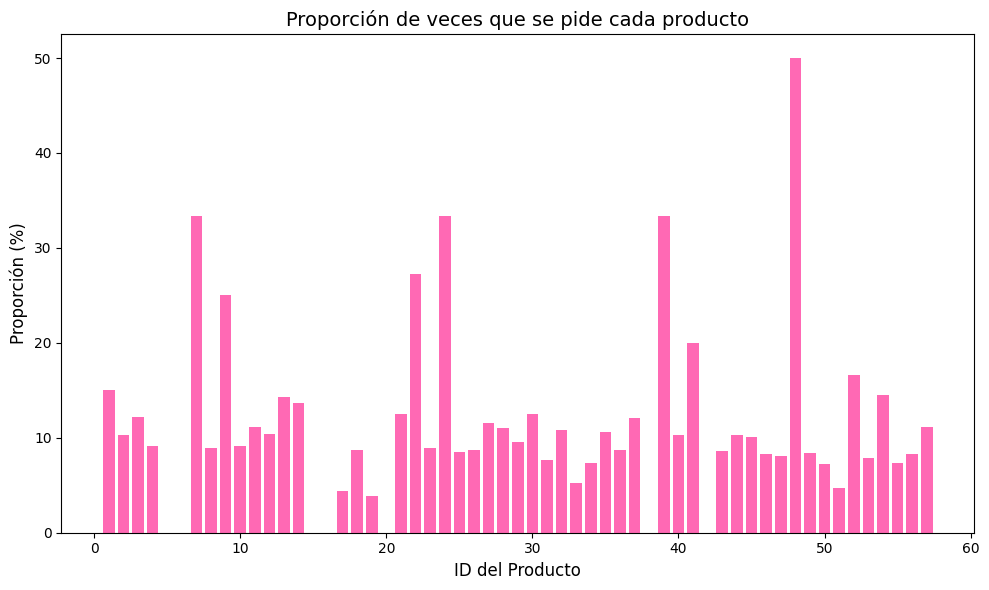

In [57]:
filtro_product_pro = agrupar_product_pro.head(n=50)

# Crear el gráfico de barras con 'product_id' en el eje X
plt.figure(figsize=(10, 6))
plt.bar(filtro_product_pro['product_id'], filtro_product_pro['proportion'], color='hotpink')

# Añadir título y etiquetas
plt.title('Proporción de veces que se pide cada producto', fontsize=14)
plt.xlabel('ID del Producto', fontsize=12)
plt.ylabel('Proporción (%)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()  # Asegura que todo el contenido quepa bien
plt.show()



# Proporción de veces que se vuelve a pedir

In [58]:
filtro_reodered_one = instacart_order_products[instacart_order_products['reordered']==1]

# Utilizamos metodo agg() para realizar calculo de total_product_id y total_add_to_cart_order

agrupar_product_pro_one = filtro_reodered_one.groupby(['product_id', 'product_name']).agg(
    
    total_product_id = ('product_id','count'),
    total_add_to_cart_order=('add_to_cart_order','sum')

)
agrupar_product_pro_one = agrupar_product_pro_one.reset_index()

# Calcular la suma total de pedidos
total_orders_pro = agrupar_product_pro_one['total_product_id'] + agrupar_product_pro_one['total_add_to_cart_order']

# Calcular la proporción usando min() 
agrupar_product_pro_one['proportion'] = (agrupar_product_pro_one[['total_product_id', 'total_add_to_cart_order']].min(axis=1) / total_orders_pro)*100

# Mostrar el resultado
print(agrupar_product_pro_one[['product_id', 'product_name', 'proportion']].head(n=50))

    product_id                                       product_name  proportion
0            1                         CHOCOLATE SANDWICH COOKIES   15.067179
1            3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   12.704918
2            4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...    9.293680
3            7                     PURE COCONUT WATER WITH ORANGE   14.285714
4            8                  CUT RUSSET POTATOES STEAM N' MASH   25.000000
5            9                  LIGHT STRAWBERRY BLUEBERRY YOGURT   10.738255
6           10     SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE    6.780422
7           11                                  PEACH MANGO JUICE   16.129032
8           12                         CHOCOLATE FUDGE LAYER CAKE    9.937888
9           13                                  SALINE NASAL MIST    8.333333
10          18                PIZZA FOR ONE SUPREMA  FROZEN PIZZA   16.666667
11          22                  FRESH BREATH ORAL RINSE MILD MIN

<div class="alert alert-block alert-info">
<p style="font-size: 20px; margin: 0;">Gráfico de Barras /Proporción de veces que se vuelve a pedir <a class="tocSkip"></a>
</div>

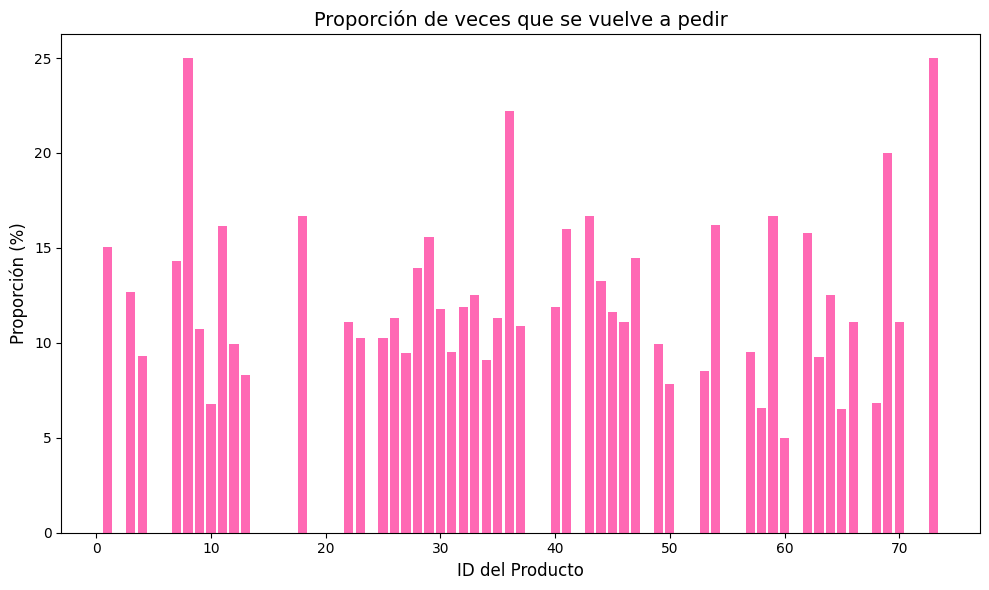

In [59]:
filtro_product_pro_one = agrupar_product_pro_one.head(n=50)

# Crear el gráfico de barras con 'product_id' en el eje X
plt.figure(figsize=(10, 6))
plt.bar(filtro_product_pro_one['product_id'], filtro_product_pro_one['proportion'], color='hotpink')

# Añadir título y etiquetas
plt.title('Proporción de veces que se vuelve a pedir', fontsize=14)
plt.xlabel('ID del Producto', fontsize=12)
plt.ylabel('Proporción (%)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()  # Asegura que todo el contenido quepa bien
plt.show()


# [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido? <a id='plancuatro12'></a>

[Ver Tabla de Contenido](#tabla)

In [60]:
filtro_reodered_zero = instacart_order_products[instacart_order_products['reordered']==1]

# Utilizamos metodo agg() para realizar calculo de total_product_id y total_add_to_cart_order
agrupar_product_user = filtro_reodered_zero.groupby(['user_id','product_id', 'product_name']).agg(
    
    total_product_id = ('product_id','count'),
    total_add_to_cart_order=('add_to_cart_order','sum')

)

agrupar_product_user = agrupar_product_user.reset_index()

# Calcular la suma total de pedidos
total_orders_user = agrupar_product_user['total_product_id'] + agrupar_product_user['total_add_to_cart_order']

# Calcular la proporción usando min() 
agrupar_product_user['proportion'] = (agrupar_product_user[['total_product_id', 'total_add_to_cart_order']].min(axis=1) / total_orders_user)*100

# Mostrar el resultado
print(agrupar_product_user[['user_id','product_name', 'proportion']].head(n=50))

    user_id                                       product_name  proportion
0         2                     CHIPOTLE BEEF & PORK REALSTICK   33.333333
1         5                                  ORGANIC RED ONION   10.000000
2         5                                    RED RASPBERRIES    8.333333
3         5                                          SNOW PEAS   12.500000
4         5                                       ORGANIC SOBA   14.285714
5         5                            PLAIN WHOLE MILK YOGURT   33.333333
6         5                               ORGANIC BLACKBERRIES    9.090909
7         5                             ORGANIC GRAPE TOMATOES   20.000000
8         5                               WHOLE VITAMIN D MILK   25.000000
9         7                                 CHICKEN QUESADILLA   20.000000
10        7                               85% LEAN GROUND BEEF   12.500000
11        7                         VANILLA COFFEE CONCENTRATE   16.666667
12        7              

<div class="alert alert-block alert-info">
<p style="font-size: 20px; margin: 0;">Gráfico de Barras / Proporción de Productos por Clientes<a class="tocSkip"></a>
</div>

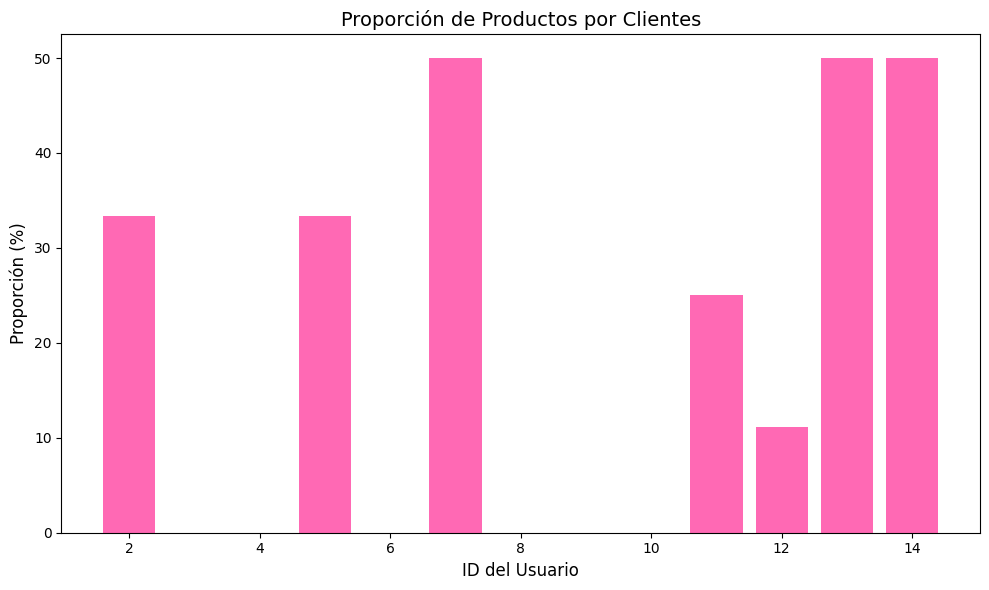

In [61]:
filtro_product_user = agrupar_product_user.head(n=50)

# Crear el gráfico de barras con 'user_id' en el eje X
plt.figure(figsize=(10, 6))
plt.bar(filtro_product_user['user_id'], filtro_product_user['proportion'], color='hotpink')

# Añadir título y etiquetas
plt.title('Proporción de Productos por Clientes', fontsize=14)
plt.xlabel('ID del Usuario', fontsize=12)
plt.ylabel('Proporción (%)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos? <a id='plancuatro13'></a>

[Ver Tabla de Contenido](#tabla)

In [62]:
#Filtar solo add_to_cart_order ==1 (Orden secuencial en la que se añadió  cada articulo)

filtro_card_order = instacart_order_products[(instacart_order_products['add_to_cart_order']>=1) & (instacart_order_products['add_to_cart_order']<=20)]

# Agrupar product_id y product_name  y contar la cantidad en add_to_cart_orde

agrupar_card_order = filtro_card_order.groupby(['product_id', 'product_name'])['add_to_cart_order'].count().reset_index(name='total_add_to_cart_order')

# Filtro los 20 productos con valores mas altos en la columna total_add_to_cart_order

filtro_total_card_order = agrupar_card_order.nlargest(20,'total_add_to_cart_order')

print(filtro_total_card_order)

       product_id              product_name  total_add_to_cart_order
22106       24852                    BANANA                    65013
11652       13176    BAG OF ORGANIC BANANAS                    52373
18779       21137      ORGANIC STRAWBERRIES                    35444
19462       21903      ORGANIC BABY SPINACH                    32479
41923       47209      ORGANIC HASS AVOCADO                    28760
42419       47766           ORGANIC AVOCADO                    23956
42296       47626               LARGE LEMON                    20447
14883       16797              STRAWBERRIES                    19167
24762       27845        ORGANIC WHOLE MILK                    19151
23308       26209                     LIMES                    18450
24868       27966       ORGANIC RASPBERRIES                    18349
20386       22935      ORGANIC YELLOW ONION                    14940
22205       24964            ORGANIC GARLIC                    14362
39950       45007          ORGANIC

<div class="alert alert-block alert-info">
<p style="font-size: 20px; margin: 0;">Gráfico de Barras/ Top 20 Productos Añadidos al Carrito<a class="tocSkip"></a>
</div>

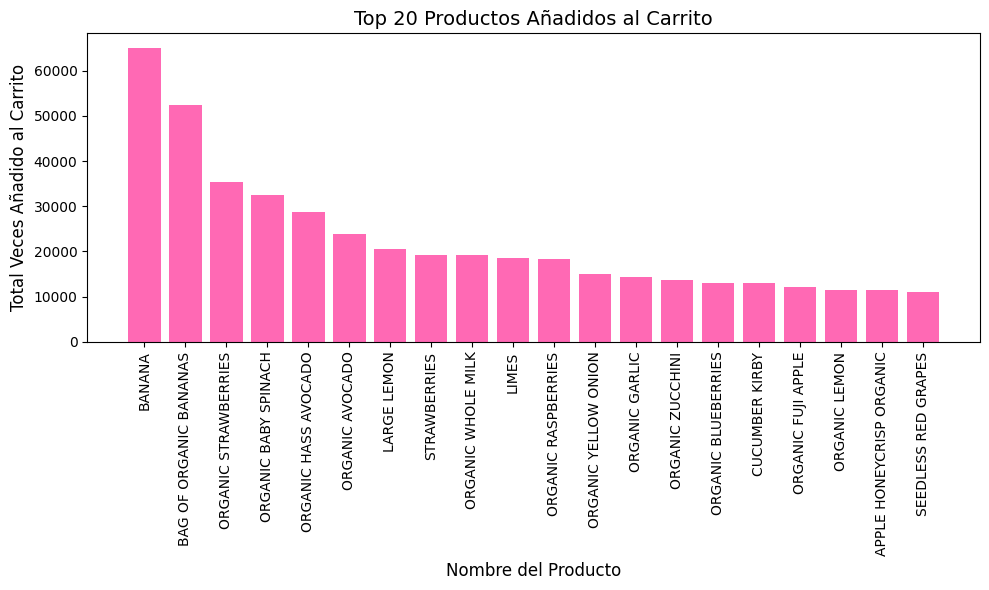

In [63]:
# Crear el gráfico de barras con 'product_name' en el eje X y 'total_add_to_cart_order' en el eje Y
plt.figure(figsize=(10, 6))
plt.bar(filtro_total_card_order['product_name'], filtro_total_card_order['total_add_to_cart_order'], color='hotpink')

# Añadir título y etiquetas
plt.title('Top 20 Productos Añadidos al Carrito', fontsize=14)
plt.xlabel('Nombre del Producto', fontsize=12)
plt.ylabel('Total Veces Añadido al Carrito', fontsize=12)

# Rotar los nombres de los productos en el eje X para mejorar la legibilidad
plt.xticks(rotation=90)

# Ajustar el gráfico para que se vea correctamente
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Conclusion general del proyecto:  <a id='plancuatro14'></a>

[Ver Tabla de Contenido](#tabla)

- Encontramos duplicados de nombres de productos no faltantes asi como engañosos no NaN.

- Los 30 pedidos duplicados encontrados son del miércoles a las 2:00 a.m.

- Se encontraron 1258 nombres de productos ausentes que pertenecen al departamento 21.

- Existe un departamento de nombre  missing en el pasillo 100 .

- Todos los pedidos con valores ausentes tienen más de 64 productos.

- Se puedo observar que entre las 10 am y 16 pm son las horas del dia donde los clientes realizan más ordenes de pedidos.

- Los dias de la semana que más que se compran viveres, son sábados y domingos son los dias en los que mas se compra viveres.

- La mayoria de los clientes esperan su mayoria, entre 7 y 30 dias para hacer otro pedido.

- Las horas del dia con mayor afluencia de ordenes es entre las 10 am y 16 pm.

- A mayor cantidad de clientes, la cantidad de número pedidos que realizan es mucho menor.

- En un pedido se suelen comprar unos 40 articulos

- Dentro de los los 20 productos más pedidos hay algunos coincidentes con los 20 articulos que piden de primero.